In [1]:
import pandas as pd

In [2]:
travels = pd.read_csv("travelData.csv", index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
travels.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
0,4116828.0,4116708.0,20180701052543,20180701064826,11170,25,2,1350,1
1,4117280.0,4117269.0,20180701072156,20180701072520,1700,3,1,1250,1
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
3,4108130.0,4116717.0,20180701224424,20180701224543,500,1,1,1250,1
4,4100122.0,4116848.0,20180701085058,20180701085910,3240,8,1,2050,1


In [3]:
allTrips = pd.read_csv("allTrips.csv", index_col=0)

In [5]:
allTrips.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
1,900079697651,500.0,41031040.0,141701792.0,2.018070e+13,2.018070e+13,4117280.0,4117269.0,단일
2,900079698254,500.0,41031121.0,141701843.0,2.018070e+13,2.018070e+13,4199619.0,4107936.0,단일
3,900079699257,500.0,41031013.0,141701450.0,2.018070e+13,2.018070e+13,4108130.0,4116717.0,단일
4,900079701419,530.0,41020001.0,141703985.0,2.018070e+13,2.018070e+13,4100122.0,4116848.0,단일
5,900079701419,530.0,41020001.0,141703953.0,2.018070e+13,2.018070e+13,4100098.0,4100121.0,단일


In [13]:
allTrips.loc[1:1]

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
1,900079697651,500.0,41031040.0,141701792.0,2.018070e+13,2.018070e+13,4117280.0,4117269.0,단일


In [4]:
stops = pd.read_csv("확보된 모든 정류장 위치.csv")

In [319]:
stops

,정류장ID,시군구,정류장명,X,Y,ARS번호
0,4100048.0,화성시,신창미션힐.송화초교,37.203780,127.038220,36350.0
1,4100049.0,화성시,홈플러스.벌말초교,37.203300,127.038130,36351.0
2,4100050.0,화성시,동탄1동행정복지센터,37.206850,127.072350,37749.0
3,4100051.0,화성시,동부출장소.병점초등학교,37.208780,127.034430,36342.0
4,4100052.0,화성시,병점입구.병점육교.화남아파트,37.210670,127.032870,36341.0
...,...,...,...,...,...,...
25107,4122059.0,시흥시,아남중전기,37.319967,126.710483,25963.0
25108,4121230.0,포천시,군내어린이집,37.858133,127.215667,41276.0
25109,4173395.0,포천시,선단동주민센터,37.854483,127.160200,40492.0
25110,4121201.0,포천시,동교3통마을회관,37.847767,127.132050,40031.0


In [5]:
stations = pd.read_csv('gis/지하철역 좌표.csv')

In [9]:
stations.head()

,Unnamed: 0,역 명칭,x,y
0,0,수원역 1호선,127.000050,37.265682
1,1,망포역 분당선,127.056855,37.245838
2,2,병점역 1호선,127.033200,37.206753
3,3,성균관대역 1호선,126.971022,37.300329
4,4,수원역 분당선,127.000244,37.266273


In [7]:
x  = [[1716, '화성시', '병점역', 0, 0, 0]]

In [8]:
stops = stops.append(pd.DataFrame(x, columns = stops.columns))

In [9]:
stops.tail()

,정류장ID,시군구,정류장명,X,Y,ARS번호
25107,4122059.0,시흥시,아남중전기,37.319967,126.710483,25963.0
25108,4121230.0,포천시,군내어린이집,37.858133,127.215667,41276.0
25109,4173395.0,포천시,선단동주민센터,37.854483,127.160200,40492.0
25110,4121201.0,포천시,동교3통마을회관,37.847767,127.132050,40031.0
0,1716.0,화성시,병점역,0.000000,0.000000,0.0


In [11]:
hwaseong = stops[stops['시군구']=='화성시']

In [12]:
interested = travels[travels['승차역ID1'].isin(hwaseong['정류장ID']) | travels['최종하차역ID'].isin(hwaseong['정류장ID'])]

In [13]:
stops[stops['정류장ID']==4120515]

,정류장ID,시군구,정류장명,X,Y,ARS번호
589,4120515.0,화성시,향남주공1.2단지,37.11913,126.91452,55285.0


In [17]:
travels.shape

(1048357, 9)

In [14]:
interested.shape

(305116, 9)

In [40]:
allTrips.loc[interested]

암호화카드번호    900079698254
교통수단CD              500
버스노선ID      4.10311e+07
차량ID        1.41702e+08
승차일시        2.01807e+13
하차일시        2.01807e+13
승차역ID       4.19962e+06
하차역ID       4.10794e+06
구분                   단일
Name: 2, dtype: object

In [44]:
allTrips.loc[[0, 0]]

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
0,900079696430,500.0,41002045.0,141771735.0,2.018070e+13,2.018070e+13,4116828.0,4150144.0,환승
0,900079696430,500.0,41002044.0,141771587.0,2.018070e+13,2.018070e+13,4150144.0,4116708.0,환승
0,900079696430,500.0,41002045.0,141771735.0,2.018070e+13,2.018070e+13,4116828.0,4150144.0,환승
0,900079696430,500.0,41002044.0,141771587.0,2.018070e+13,2.018070e+13,4150144.0,4116708.0,환승


In [15]:
trips_interested = allTrips.loc[interested.index.unique()]

In [20]:
trips_interested.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
2,900079698254,500.0,41031121.0,141701843.0,2.018070e+13,2.018070e+13,4199619.0,4107936.0,단일
6,900079705567,511.0,41067109.0,141763724.0,2.018070e+13,2.018070e+13,4197606.0,1716.0,환승
6,900079705567,202.0,0.0,999999999.0,2.018070e+13,2.018070e+13,1716.0,4116611.0,환승
6,900079705567,500.0,41021002.0,141711728.0,2.018070e+13,2.018070e+13,4116611.0,4116627.0,환승
7,900079705567,120.0,41110050.0,999999999.0,2.018070e+13,2.018070e+13,9814.0,1708.0,환승


In [16]:
from collections import Counter

In [22]:
Counter(trips_interested['구분']).most_common()

[('환승', 285761), ('단일', 174844)]

In [25]:
interested['환승횟수'].sum()/interested.shape[0]

1.5389950051783583

In [51]:
Counter(trips_interested['버스노선ID']).most_common()

[(0.0, 46982),
 (41031020.0, 14563),
 (41031040.0, 13359),
 (41036132.0, 13314),
 (41036111.0, 12838),
 (41031108.0, 12528),
 (41067131.0, 11979),
 (41031121.0, 11631),
 (41036131.0, 11325),
 (41008170.0, 10331),
 (41002044.0, 10267),
 (41067012.0, 10255),
 (41067109.0, 9990),
 (41027009.0, 9353),
 (41008148.0, 9219),
 (41002046.0, 9115),
 (41067135.0, 8901),
 (41002038.0, 8073),
 (41036108.0, 7807),
 (41031030.0, 6572),
 (41002090.0, 5910),
 (41074061.0, 5841),
 (41036113.0, 5399),
 (41074077.0, 5238),
 (41086011.0, 5174),
 (41086008.0, 4938),
 (41020001.0, 4865),
 (41036006.0, 4753),
 (41036115.0, 4680),
 (41003338.0, 4392),
 (41031013.0, 4329),
 (41031004.0, 4296),
 (41008152.0, 3787),
 (41324002.0, 3752),
 (41075031.0, 3532),
 (41086002.0, 3438),
 (41086005.0, 3354),
 (41075017.0, 3247),
 (41036105.0, 3074),
 (41031125.0, 3017),
 (41036128.0, 2841),
 (41008151.0, 2837),
 (41002045.0, 2725),
 (41031107.0, 2710),
 (41067005.0, 2665),
 (41061025.0, 2638),
 (41007133.0, 2570),
 (413240

In [73]:
Counter(trips_interested['승차역ID']).most_common()

[(4108044.0, 10249),
 (1716.0, 8086),
 (4100048.0, 7886),
 (4151651.0, 7740),
 (1869.0, 6719),
 (1713.0, 6511),
 (4100049.0, 5689),
 (4100051.0, 5593),
 (4117183.0, 5026),
 (4122214.0, 4322),
 (4108036.0, 3877),
 (4116671.0, 3733),
 (4197467.0, 3571),
 (4170973.0, 3570),
 (4170271.0, 3214),
 (4130131.0, 3170),
 (4108034.0, 2992),
 (4170093.0, 2987),
 (4199455.0, 2819),
 (4119379.0, 2584),
 (4117322.0, 2567),
 (4199435.0, 2566),
 (4108035.0, 2512),
 (4170243.0, 2508),
 (4197464.0, 2358),
 (4121008.0, 2286),
 (4117321.0, 2118),
 (4130123.0, 2072),
 (4130121.0, 2050),
 (4116982.0, 2032),
 (4107935.0, 1998),
 (4113599.0, 1987),
 (4117231.0, 1956),
 (4197592.0, 1869),
 (4195716.0, 1866),
 (4116674.0, 1838),
 (4108031.0, 1786),
 (4170974.0, 1780),
 (4170570.0, 1779),
 (4197463.0, 1779),
 (4116678.0, 1715),
 (4107928.0, 1645),
 (4100052.0, 1645),
 (4170943.0, 1643),
 (4102820.0, 1635),
 (4170507.0, 1630),
 (4197554.0, 1575),
 (4108040.0, 1554),
 (4108037.0, 1523),
 (4106798.0, 1519),
 (411731

In [77]:
stops[stops['정류장ID']==4100048]

,정류장ID,시군구,정류장명,X,Y,ARS번호
0,4100048.0,화성시,신창미션힐.송화초교,37.20378,127.03822,36350.0


In [74]:
interested.

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
6,4197606.0,4116627.0,20180701075731,20180701085359,24480,39,3,1550,1
7,9814.0,4197607.0,20180701154641,20180701163919,24490,41,3,1550,1
12,4100084.0,4170526.0,20180701144943,20180701152035,8730,21,2,2050,1
14,4108051.0,4108037.0,20180701165009,20180701171136,6120,21,1,1250,1


In [79]:
interested.describe()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
count,3.051160e+05,3.051160e+05,3.051160e+05,3.051160e+05,305116.000000,305116.000000,305116.000000,305116.000000,305116.000000
mean,3.925334e+06,3.921344e+06,2.018070e+13,2.018070e+13,12938.337190,33.135784,1.538995,1437.186054,1.321776
std,1.100405e+06,1.107828e+06,8.705344e+05,8.732655e+05,13300.338042,25.905253,0.713106,468.377362,0.943577
min,1.500000e+02,1.500000e+02,2.018070e+13,2.018070e+13,0.000000,0.000000,1.000000,0.000000,1.000000
25%,4.108044e+06,4.108048e+06,2.018070e+13,2.018070e+13,4190.000000,13.000000,1.000000,1250.000000,1.000000
50%,4.119428e+06,4.119436e+06,2.018070e+13,2.018070e+13,8470.000000,27.000000,1.000000,1250.000000,1.000000
75%,4.170353e+06,4.170354e+06,2.018070e+13,2.018070e+13,15320.000000,46.000000,2.000000,1450.000000,1.000000
max,9.636970e+06,9.636968e+06,2.018070e+13,2.018071e+13,163204.000000,639.000000,5.000000,10000.000000,8.000000


In [17]:
import geopandas as gpd

In [18]:
stopsWithSections = gpd.read_file("gis/정류장격자위치.geojson")

In [19]:
stopsWithSections.shape

(22319, 12)

In [385]:
stopsWithSections.head()

,정류장ID,시군구,정류장명,X,Y,ARS번호,left,top,right,bottom,id,geometry
0,4100048.0,화성시,신창미션힐.송화초교,37.20378,127.03822,36350.0,958504.003921,1.912610e+06,959504.003921,1.911610e+06,8073,MULTIPOINT (127.03822 37.20378)
1,4100049.0,화성시,홈플러스.벌말초교,37.20330,127.03813,36351.0,958504.003921,1.912610e+06,959504.003921,1.911610e+06,8073,MULTIPOINT (127.03813 37.20330)
2,4100050.0,화성시,동탄1동행정복지센터,37.20685,127.07235,37749.0,961504.003921,1.912610e+06,962504.003921,1.911610e+06,8541,MULTIPOINT (127.07235 37.20685)
3,4100051.0,화성시,동부출장소.병점초등학교,37.20878,127.03443,36342.0,958504.003921,1.912610e+06,959504.003921,1.911610e+06,8073,MULTIPOINT (127.03443 37.20878)
4,4100052.0,화성시,병점입구.병점육교.화남아파트,37.21067,127.03287,36341.0,958504.003921,1.912610e+06,959504.003921,1.911610e+06,8073,MULTIPOINT (127.03287 37.21067)


In [20]:
stopGridPos = stopsWithSections[['정류장ID', 'id']]

In [21]:
st = gpd.read_file('gis/지하철역격자위치.geojson')

In [22]:
stIds = """1713
1869
1716
1711
1846
1871
1719
4316
1712
1868
1867
1858
1717
1457
1855
1706
1715
1862
222
1724
1708
1872
1870
4307
1702
1854
4311
1865
4315
1707
4317
1857
1859
4125
4314
1866
4318
232
219
223
220
239
221
226
234
216
202
150
240
238
152
230
228
151
224
233
212
227
211
236
214
225
153
203
235
231
217
237
154
241
218
229
158
155
215
213
208
205
209
249
156
210
157
248
159
201
206
243
207
204
242
247
246
244
245
250"""

In [23]:
stIds = stIds.split("\n")

In [24]:
st['field_1'] = stIds

In [25]:
stopGridPos

,정류장ID,id
0,4100048.0,7171
1,4100049.0,7171
2,4100050.0,7458
3,4100051.0,7170
4,4100052.0,7074
...,...,...
22314,4122063.0,4181
22315,4122062.0,4277
22316,4122061.0,4277
22317,4122060.0,4374


In [26]:
sliced = st[['field_1', 'id']]

sliced.columns = ['정류장ID', 'id']

sliced['정류장ID'] = sliced['정류장ID'].astype(float)

concatenated = pd.concat([stopGridPos, sliced])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
od = interested[['승차역ID1', '최종하차역ID']]

In [413]:
od.head()

,승차역ID1,최종하차역ID
2,4199619.0,4107936.0
6,4197606.0,4116627.0
7,9814.0,4197607.0
12,4100084.0,4170526.0
14,4108051.0,4108037.0


In [28]:
od1 = od.merge(concatenated, how='left', left_on='승차역ID1', right_on = '정류장ID')

In [29]:
od1 = od.reset_index().merge(concatenated, how='left', left_on='승차역ID1', right_on = '정류장ID').set_index('index')

In [30]:
od1 = od1.drop('정류장ID', axis=1)

In [31]:
od1.columns = ['승차정류장', '하차정류장', '승차id']

In [32]:
od1.head()

,승차정류장,하차정류장,승차id
index,,,
2,4199619.0,4107936.0,6123.0
6,4197606.0,4116627.0,7267.0
7,9814.0,4197607.0,NaN
12,4100084.0,4170526.0,6974.0
14,4108051.0,4108037.0,7068.0


In [33]:
od2 = od1.reset_index().merge(concatenated, how='left', left_on='하차정류장', right_on = '정류장ID').set_index('index')

In [34]:
od2.head()

,승차정류장,하차정류장,승차id,정류장ID,id
index,,,,,
2,4199619.0,4107936.0,6123.0,4107936.0,6971.0
6,4197606.0,4116627.0,7267.0,4116627.0,6288.0
7,9814.0,4197607.0,NaN,4197607.0,7267.0
12,4100084.0,4170526.0,6974.0,4170526.0,7363.0
14,4108051.0,4108037.0,7068.0,4108037.0,7359.0


In [35]:
od2 = od2.drop(['정류장ID'], axis=1)
od2.columns = ['승차정류장', '하차정류장', '승차ID', '하차ID']

In [36]:
od2.shape

(305116, 4)

In [37]:
Counter(od2[od2['승차ID'].isna()]['승차정류장']).most_common()

[(4113599.0, 1001),
 (4151640.0, 416),
 (7101696.0, 413),
 (4151631.0, 227),
 (2748.0, 191),
 (4116517.0, 185),
 (4116660.0, 179),
 (1710.0, 176),
 (1856.0, 161),
 (4103279.0, 140),
 (1709.0, 139),
 (1728.0, 138),
 (4151634.0, 135),
 (1721.0, 124),
 (1729.0, 120),
 (4151636.0, 120),
 (4199496.0, 118),
 (1727.0, 116),
 (1701.0, 113),
 (1456.0, 112),
 (4135007.0, 109),
 (1714.0, 108),
 (1864.0, 103),
 (1006.0, 101),
 (1455.0, 95),
 (4108431.0, 95),
 (1853.0, 88),
 (4108418.0, 88),
 (1722.0, 87),
 (1718.0, 83),
 (1759.0, 80),
 (1703.0, 80),
 (4103263.0, 77),
 (4100717.0, 77),
 (4121326.0, 76),
 (2819.0, 75),
 (1806.0, 74),
 (1751.0, 71),
 (4151628.0, 69),
 (4111614.0, 67),
 (1705.0, 65),
 (1863.0, 65),
 (4103260.0, 64),
 (1851.0, 64),
 (4121329.0, 62),
 (1756.0, 60),
 (1003.0, 59),
 (329.0, 57),
 (1454.0, 57),
 (4517.0, 54),
 (4129.0, 54),
 (420.0, 52),
 (1725.0, 52),
 (9176942.0, 51),
 (1723.0, 51),
 (2749.0, 48),
 (2750.0, 47),
 (1861.0, 47),
 (4505.0, 46),
 (4135006.0, 46),
 (1860.0, 4

In [424]:
od2[od2['승차ID'].isna()].head()

,승차정류장,하차정류장,승차ID,하차ID
index,,,,
7,9814.0,4197607.0,NaN,7267.0
61,2806810.0,4119432.0,NaN,6497.0
207,4113599.0,4197470.0,NaN,7362.0
263,1006.0,4117396.0,NaN,7166.0
272,4117179.0,4196917.0,NaN,7455.0


In [38]:
od_dropped = od2.dropna(subset= ['승차ID', '하차ID'])

In [39]:
od_dropped.shape

(273687, 4)

In [72]:
od_dropped

,승차정류장,하차정류장,승차ID,하차ID
0,4199619.0,4107936.0,6123.0,6971.0
1,4197606.0,4116627.0,7267.0,6288.0
3,4100084.0,4170526.0,6974.0,7363.0
4,4108051.0,4108037.0,7068.0,7359.0
5,4108036.0,4106798.0,7359.0,7262.0
...,...,...,...,...
305111,4170271.0,4100038.0,7170.0,7367.0
305112,4116675.0,4116690.0,6593.0,6882.0
305113,4116675.0,4116690.0,6593.0,6882.0
305114,4197552.0,4199455.0,7458.0,7457.0


In [40]:
od_dropped = od_dropped.astype(int)
od_dropped['승하차'] = od_dropped['승차ID'].astype(str) + "-" + od_dropped['하차ID'].astype(str)

In [113]:
od_dropped[od_dropped['승차ID']==od_dropped['하차ID']]

,승차정류장,하차정류장,승차ID,하차ID,승하차
index,,,,,
138,4199624,4198939,6123,6123,6123-6123
328,4130130,4100048,7171,7171,7171-7171
758,4117233,4199835,7361,7361,7361-7361
844,4108031,4108034,7360,7360,7360-7360
1068,4116677,4116673,6593,6593,6593-6593
...,...,...,...,...,...
1028562,4108010,4108012,7170,7170,7170-7170
1033805,4116674,4116673,6593,6593,6593-6593
1033805,4116674,4116673,6593,6593,6593-6593


In [76]:
travels.loc[33:34]

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
33,4107942.0,4107942.0,20180701075448,20180701075458,0,0,1,870,4
34,4108187.0,4170110.0,20180701155838,20180701164015,12080,42,1,1350,1


In [83]:
interested.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
6,4197606.0,4116627.0,20180701075731,20180701085359,24480,39,3,1550,1
7,9814.0,4197607.0,20180701154641,20180701163919,24490,41,3,1550,1
12,4100084.0,4170526.0,20180701144943,20180701152035,8730,21,2,2050,1
14,4108051.0,4108037.0,20180701165009,20180701171136,6120,21,1,1250,1


In [114]:
od_dropped.head()

,승차정류장,하차정류장,승차ID,하차ID,승하차
index,,,,,
2,4199619,4107936,6123,6971,6123-6971
6,4197606,4116627,7267,6288,7267-6288
12,4100084,4170526,6974,7363,6974-7363
14,4108051,4108037,7068,7359,7068-7359
15,4108036,4106798,7359,7262,7359-7262


In [116]:
travels.loc[2:2]

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1


In [42]:
connected = od_dropped.groupby('승하차').size().sort_values(ascending=False)

In [43]:
connected.head()

승하차
7460-7458    942
6780-6401    843
7460-7459    798
7358-7456    751
6401-6780    746
dtype: int64

In [41]:
from shapely.geometry import LineString

In [44]:
connected = pd.DataFrame(connected)

connected.columns = ['이동']

In [45]:
connected.head()

,이동
승하차,
7460-7458,942
6780-6401,843
7460-7459,798
7358-7456,751
6401-6780,746


In [122]:
idPoints = gpd.read_file('gis/centroids.geojson')

In [125]:
idPoints.head()

,id,geometry
0,1,POINT (126.19512 37.79039)
1,2,POINT (126.19527 37.78138)
2,3,POINT (126.19543 37.77236)
3,4,POINT (126.19559 37.76335)
4,5,POINT (126.19575 37.75434)


In [133]:
connected.tail()

,이동
승하차,
7073-6973,1
7073-6874,1
7073-6683,1
7073-6584,1
10055-7361,1


In [239]:
connected = connected.reset_index()

In [240]:
connected.head()

,승하차,이동
0,7458-7460,1612
1,6401-6780,1589
2,7170-7171,1398
3,7459-7460,1246
4,7456-7458,1099


In [241]:
connected['승차'] = connected['승하차'].apply(lambda x : x.split("-")[0])

In [242]:
connected['하차'] = connected['승하차'].apply(lambda x : x.split("-")[1])

In [243]:
connected.tail()

,승하차,이동,승차,하차
21768,6574-7362,1,6574,7362
21769,6574-7266,1,6574,7266
21770,6574-7171,1,6574,7171
21771,6574-7170,1,6574,7170
21772,3281-7360,1,3281,7360


In [244]:
connected['승차'] = connected['승차'].apply(pd.to_numeric)

In [245]:
connected['하차'] = connected['하차'].apply(pd.to_numeric)

In [246]:
connected['승차']

0        7458
1        6401
2        7170
3        7459
4        7456
         ... 
21768    6574
21769    6574
21770    6574
21771    6574
21772    3281
Name: 승차, Length: 21773, dtype: int64

In [247]:
con1 = connected.merge(idPoints, left_on='승차', right_on='id')

In [248]:
con1.head()

,승하차,이동,승차,하차,id,geometry
0,7458-7460,1612,7458,7460,7458,POINT (127.07294 37.21096)
1,7458-7459,1023,7458,7459,7458,POINT (127.07294 37.21096)
2,7458-7843,897,7458,7843,7458,POINT (127.07294 37.21096)
3,7458-7746,630,7458,7746,7458,POINT (127.07294 37.21096)
4,7458-7650,370,7458,7650,7458,POINT (127.07294 37.21096)


In [249]:
con1 = con1.drop(['id'], axis=1)

In [250]:
con1.columns = ['승하차', '이동', '승차', '하차', '승차점']

In [251]:
con2 = con1.merge(idPoints, left_on='하차', right_on='id')

In [252]:
con2

,승하차,이동,승차,하차,승차점,id,geometry
0,7458-7460,1612,7458,7460,POINT (127.07294 37.21096),7460,POINT (127.07304 37.19293)
1,6401-7460,11,6401,7460,POINT (126.94891 37.21946),7460,POINT (127.07304 37.19293)
2,7170-7460,306,7170,7460,POINT (127.03913 37.21083),7460,POINT (127.07304 37.19293)
3,7459-7460,1246,7459,7460,POINT (127.07299 37.20194),7460,POINT (127.07304 37.19293)
4,7456-7460,485,7456,7460,POINT (127.07284 37.22898),7460,POINT (127.07304 37.19293)
...,...,...,...,...,...,...,...
21768,4007-4102,1,4007,4102,POINT (126.66774 37.16373),4102,POINT (126.67890 37.17282)
21769,3910-4006,1,3910,4006,POINT (126.65637 37.17267),4006,POINT (126.66764 37.17275)
21770,4198-4198,1,4198,4198,POINT (126.69016 37.17290),4198,POINT (126.69016 37.17290)
21771,4179-5264,1,4179,5264,POINT (126.68833 37.34415),5264,POINT (126.81488 37.08355)


In [253]:
con2 = con2.drop(['id'], axis=1)
con2.columns = ['승하차', '이동', '승차', '하차', '승차점', '하차점']

In [254]:
con2.head()

,승하차,이동,승차,하차,승차점,하차점
0,7458-7460,1612,7458,7460,POINT (127.07294 37.21096),POINT (127.07304 37.19293)
1,6401-7460,11,6401,7460,POINT (126.94891 37.21946),POINT (127.07304 37.19293)
2,7170-7460,306,7170,7460,POINT (127.03913 37.21083),POINT (127.07304 37.19293)
3,7459-7460,1246,7459,7460,POINT (127.07299 37.20194),POINT (127.07304 37.19293)
4,7456-7460,485,7456,7460,POINT (127.07284 37.22898),POINT (127.07304 37.19293)


In [255]:
con2['geometry'] = [LineString([x[0], x[1]]) for x in con2[['승차점', '하차점']].values]

In [256]:
con2.head()

,승하차,이동,승차,하차,승차점,하차점,geometry
0,7458-7460,1612,7458,7460,POINT (127.07294 37.21096),POINT (127.07304 37.19293),LINESTRING (127.0729379815373 37.2109552163216...
1,6401-7460,11,6401,7460,POINT (126.94891 37.21946),POINT (127.07304 37.19293),LINESTRING (126.9489052956637 37.2194570873054...
2,7170-7460,306,7170,7460,POINT (127.03913 37.21083),POINT (127.07304 37.19293),LINESTRING (127.039128460777 37.21082849671275...
3,7459-7460,1246,7459,7460,POINT (127.07299 37.20194),POINT (127.07304 37.19293),LINESTRING (127.0729887712516 37.2019413522344...
4,7456-7460,485,7456,7460,POINT (127.07284 37.22898),POINT (127.07304 37.19293),LINESTRING (127.0728363342656 37.2289829030659...


In [257]:
con2Converted = gpd.GeoDataFrame(con2)

In [258]:
con2Converted.head()

,승하차,이동,승차,하차,승차점,하차점,geometry
0,7458-7460,1612,7458,7460,POINT (127.07294 37.21096),POINT (127.07304 37.19293),"LINESTRING (127.07294 37.21096, 127.07304 37.1..."
1,6401-7460,11,6401,7460,POINT (126.94891 37.21946),POINT (127.07304 37.19293),"LINESTRING (126.94891 37.21946, 127.07304 37.1..."
2,7170-7460,306,7170,7460,POINT (127.03913 37.21083),POINT (127.07304 37.19293),"LINESTRING (127.03913 37.21083, 127.07304 37.1..."
3,7459-7460,1246,7459,7460,POINT (127.07299 37.20194),POINT (127.07304 37.19293),"LINESTRING (127.07299 37.20194, 127.07304 37.1..."
4,7456-7460,485,7456,7460,POINT (127.07284 37.22898),POINT (127.07304 37.19293),"LINESTRING (127.07284 37.22898, 127.07304 37.1..."


In [259]:
con2Converted.drop(['승차점', '하차점'], axis=1, inplace=True)

In [260]:
con2Converted.to_file('gis/버스이동_화성시_통합.shp', encoding='utf-8')

In [195]:
od_dropped.shape

(273687, 5)

In [196]:
od_dropped.head()

,승차정류장,하차정류장,승차ID,하차ID,승하차
index,,,,,
2,4199619,4107936,6123,6971,6123-6971
6,4197606,4116627,7267,6288,7267-6288
12,4100084,4170526,6974,7363,6974-7363
14,4108051,4108037,7068,7359,7068-7359
15,4108036,4106798,7359,7262,7359-7262


In [211]:
od_dropped[od_dropped['승차정류장'].isin(hwaseong['정류장ID']) != od_dropped['하차정류장'].isin(hwaseong['정류장ID'])]

,승차정류장,하차정류장,승차ID,하차ID,승하차
index,,,,,
2,4199619,4107936,6123,6971,6123-6971
6,4197606,4116627,7267,6288,7267-6288
12,4100084,4170526,6974,7363,6974-7363
14,4108051,4108037,7068,7359,7068-7359
15,4108036,4106798,7359,7262,7359-7262
...,...,...,...,...,...
1046580,4117183,4114077,6780,6401,6780-6401
1047000,4100037,4100048,7367,7171,7367-7171
1047000,4100037,4100048,7367,7171,7367-7171


In [212]:
od_dropped.shape

(273687, 5)

In [213]:
od_dropped.head()

,승차정류장,하차정류장,승차ID,하차ID,승하차
index,,,,,
2,4199619,4107936,6123,6971,6123-6971
6,4197606,4116627,7267,6288,7267-6288
12,4100084,4170526,6974,7363,6974-7363
14,4108051,4108037,7068,7359,7068-7359
15,4108036,4106798,7359,7262,7359-7262


In [215]:
od_dropped['하승차'] = od_dropped['승차ID'].astype(str) + "-" + od_dropped['하차ID'].astype(str)

In [216]:
od_dropped['하승차']

index
2          6123-6971
6          7267-6288
12         6974-7363
14         7068-7359
15         7359-7262
             ...    
1047001    7170-7367
1047476    6593-6882
1047476    6593-6882
1048553    7458-7457
1048553    7458-7457
Name: 하승차, Length: 273687, dtype: object

In [222]:
od_dropped.drop(['승하차', '하승차'], inplace=True, axis=1)

In [46]:
od_dropped['승하차'] = ["-".join([str(y) for y in sorted(x)]) for x in od_dropped[['승차ID', '하차ID']].values]

In [47]:
od_dropped.head()

,승차정류장,하차정류장,승차ID,하차ID,승하차
index,,,,,
2,4199619,4107936,6123,6971,6123-6971
6,4197606,4116627,7267,6288,6288-7267
12,4100084,4170526,6974,7363,6974-7363
14,4108051,4108037,7068,7359,7068-7359
15,4108036,4106798,7359,7262,7262-7359


In [48]:
connected = od_dropped.groupby('승하차').size().sort_values(ascending=False)

In [49]:
connected

승하차
7458-7460    1612
6401-6780    1589
7170-7171    1398
7459-7460    1246
7456-7458    1099
             ... 
6574-7362       1
6574-7266       1
6574-7171       1
6574-7170       1
3281-7360       1
Length: 21773, dtype: int64

In [50]:
interested.shape

(305116, 9)

In [263]:
interested.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
6,4197606.0,4116627.0,20180701075731,20180701085359,24480,39,3,1550,1
7,9814.0,4197607.0,20180701154641,20180701163919,24490,41,3,1550,1
12,4100084.0,4170526.0,20180701144943,20180701152035,8730,21,2,2050,1
14,4108051.0,4108037.0,20180701165009,20180701171136,6120,21,1,1250,1


In [290]:
inside = interested[interested['승차역ID1'].isin(hwaseong['정류장ID']) & interested['최종하차역ID'].isin(hwaseong['정류장ID'])]

outside = interested[interested['승차역ID1'].isin(hwaseong['정류장ID']) != interested['최종하차역ID'].isin(hwaseong['정류장ID'])]

In [267]:
outside.shape

(205621, 9)

In [292]:
outside.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30
6,4197606.0,4116627.0,2018-07-01 07:57:31,2018-07-01 08:53:59,24480,39,3,1550,1,00:56:28
7,9814.0,4197607.0,2018-07-01 15:46:41,2018-07-01 16:39:19,24490,41,3,1550,1,00:52:38
12,4100084.0,4170526.0,2018-07-01 14:49:43,2018-07-01 15:20:35,8730,21,2,2050,1,00:30:52
14,4108051.0,4108037.0,2018-07-01 16:50:09,2018-07-01 17:11:36,6120,21,1,1250,1,00:21:27


In [293]:
outside.describe()

,승차역ID1,최종하차역ID,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간
count,2.056210e+05,2.056210e+05,205621.000000,205621.000000,205621.000000,205621.000000,205621.000000,205621
mean,3.813989e+06,3.805354e+06,16725.296152,41.550391,1.689633,1522.783422,1.247757,0 days 00:47:12.612520
std,1.312506e+06,1.315662e+06,14320.551515,26.109002,0.747960,501.467162,0.841269,0 days 00:30:37.494533
min,1.500000e+02,1.500000e+02,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:15
25%,4.108031e+06,4.108013e+06,7270.000000,22.000000,1.000000,1250.000000,1.000000,0 days 00:24:25
50%,4.116982e+06,4.117030e+06,11280.000000,36.000000,2.000000,1350.000000,1.000000,0 days 00:40:54
75%,4.170093e+06,4.151636e+06,21190.000000,55.000000,2.000000,1590.000000,1.000000,0 days 01:03:44
max,9.636970e+06,9.636968e+06,163204.000000,639.000000,5.000000,10000.000000,8.000000,0 days 14:33:32


In [294]:
inside.describe()

,승차역ID1,최종하차역ID,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간
count,9.949500e+04,9.949500e+04,99495.000000,99495.000000,99495.000000,99495.000000,99495.000000,99495
mean,4.155446e+06,4.161054e+06,5112.031459,15.745766,1.227680,1260.286547,1.474747,0 days 00:17:58.067973
std,2.732266e+05,3.179458e+05,5270.117638,14.157660,0.509379,326.527853,1.110406,0 days 00:18:09.204782
min,1.716000e+03,1.716000e+03,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:01
25%,4.117318e+06,4.117325e+06,2040.000000,7.000000,1.000000,1250.000000,1.000000,0 days 00:06:52
50%,4.130123e+06,4.130181e+06,3650.000000,12.000000,1.000000,1250.000000,1.000000,0 days 00:12:37
75%,4.170942e+06,4.170944e+06,6310.000000,20.000000,1.000000,1250.000000,1.000000,0 days 00:22:33
max,9.170723e+06,9.170723e+06,137426.000000,347.000000,5.000000,6260.000000,8.000000,0 days 06:36:47


In [271]:
interested.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
2,4199619.0,4107936.0,20180701123653,20180701134223,23180,66,1,1550,1
6,4197606.0,4116627.0,20180701075731,20180701085359,24480,39,3,1550,1
7,9814.0,4197607.0,20180701154641,20180701163919,24490,41,3,1550,1
12,4100084.0,4170526.0,20180701144943,20180701152035,8730,21,2,2050,1
14,4108051.0,4108037.0,20180701165009,20180701171136,6120,21,1,1250,1


In [51]:
interested['최초승차일시'] = interested['최초승차일시'].apply(pd.to_datetime, format="%Y%m%d%H%M%S")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
interested['최종하차일시'] = interested['최종하차일시'].apply(pd.to_datetime, format="%Y%m%d%H%M%S")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [284]:
interested.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1
6,4197606.0,4116627.0,2018-07-01 07:57:31,2018-07-01 08:53:59,24480,39,3,1550,1
7,9814.0,4197607.0,2018-07-01 15:46:41,2018-07-01 16:39:19,24490,41,3,1550,1
12,4100084.0,4170526.0,2018-07-01 14:49:43,2018-07-01 15:20:35,8730,21,2,2050,1
14,4108051.0,4108037.0,2018-07-01 16:50:09,2018-07-01 17:11:36,6120,21,1,1250,1


In [281]:
interested.shape

(305116, 9)

In [54]:
interested['총소요시간'] = interested['최종하차일시'] - interested['최초승차일시']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
interested['총소요시간']

2         01:05:30
6         00:56:28
7         00:52:38
12        00:30:52
14        00:21:27
            ...   
1047001   00:08:58
1047476   00:10:13
1047476   00:10:13
1048553   00:02:50
1048553   00:02:50
Name: 총소요시간, Length: 305116, dtype: timedelta64[ns]

In [56]:
st

,field_1,역 명칭,x,y,left,top,right,bottom,id,geometry
0,1713,수원역 1호선,127.000050,37.265682,955606.838502,1.919045e+06,956606.838502,1.918045e+06,6876,MULTIPOINT (127.00005 37.26568)
1,1869,망포역 분당선,127.056855,37.245838,960606.838502,1.917045e+06,961606.838502,1.916045e+06,7358,MULTIPOINT (127.05685 37.24584)
2,1716,병점역 1호선,127.033200,37.206753,957606.838502,1.913045e+06,958606.838502,1.912045e+06,7074,MULTIPOINT (127.03320 37.20675)
3,1711,성균관대역 1호선,126.971022,37.300329,952606.838502,1.923045e+06,953606.838502,1.922045e+06,6584,MULTIPOINT (126.97102 37.30033)
4,1846,수원역 분당선,127.000244,37.266273,955606.838502,1.919045e+06,956606.838502,1.918045e+06,6876,MULTIPOINT (127.00024 37.26627)
...,...,...,...,...,...,...,...,...,...,...
91,247,도림천역 2호선,126.882649,37.514508,944606.838502,1.947045e+06,945606.838502,1.946045e+06,5792,MULTIPOINT (126.88265 37.51451)
92,246,신설동역 2호선,127.024918,37.574805,957606.838502,1.953045e+06,958606.838502,1.952045e+06,7034,MULTIPOINT (127.02492 37.57480)
93,244,용답역 2호선,127.050892,37.562125,959606.838502,1.952045e+06,960606.838502,1.951045e+06,7227,MULTIPOINT (127.05089 37.56212)
94,245,신답역 2호선,127.047080,37.569839,959606.838502,1.953045e+06,960606.838502,1.952045e+06,7226,MULTIPOINT (127.04708 37.56984)


In [298]:
stops[stops['시군구'].isna()]

,정류장ID,시군구,정류장명,X,Y,ARS번호


In [57]:
stationsWithRegion = gpd.read_file("gis/지하철역격자위치_기초자치단체포함.geojson")

In [300]:
stationsWithRegion.head()

,field_1,역 명칭,x,y,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,0,수원역 1호선,127.000050,37.265682,41115,"Paldal-gu, Suwon-si",수원시 팔달구,MULTIPOINT (127.00005 37.26568)
1,1,망포역 분당선,127.056855,37.245838,41117,"Yeongtong-gu, Suwon-si",수원시 영통구,MULTIPOINT (127.05685 37.24584)
2,2,병점역 1호선,127.033200,37.206753,41590,Hwaseong-si,화성시,MULTIPOINT (127.03320 37.20675)
3,3,성균관대역 1호선,126.971022,37.300329,41111,"Jangan-gu, Suwon-si",수원시 장안구,MULTIPOINT (126.97102 37.30033)
4,4,수원역 분당선,127.000244,37.266273,41115,"Paldal-gu, Suwon-si",수원시 팔달구,MULTIPOINT (127.00024 37.26627)


In [304]:
print("\n".join(stationsWithRegion['SIG_KOR_NM'].values))

수원시 팔달구
수원시 영통구
화성시
수원시 장안구
수원시 팔달구
수원시 팔달구
오산시
용인시수지구
수원시 팔달구
수원시 영통구
수원시 영통구
성남시 분당구
오산시
안양시동안구
성남시 분당구
안양시만안구
수원시 권선구
용인시기흥구
강남구
평택시
군포시
수원시 팔달구
수원시 영통구
강남구
금천구
성남시 분당구
성남시 분당구
용인시기흥구
용인시수지구
안양시만안구
용인시수지구
성남시 분당구
성남시 분당구
강남구
용인시수지구
용인시기흥구
수원시 영통구
구로구
강남구
서초구
강남구
마포구
강남구
동작구
구로구
송파구
중구
중구
서대문구
마포구
종로구
관악구
관악구
중구
서초구
구로구
광진구
관악구
성동구
영등포구
광진구
서초구
종로구
중구
영등포구
관악구
송파구
영등포구
종로구
마포구
송파구
관악구
동대문구
종로구
송파구
광진구
성동구
중구
성동구
양천구
동대문구
성동구
동대문구
양천구
종로구
중구
중구
서대문구
성동구
중구
서대문구
구로구
동대문구
성동구
성동구
동대문구


In [58]:
region = """수원시
수원시
화성시
수원시
수원시
수원시
오산시
용인시
수원시
수원시
수원시
성남시
오산시
안양시
성남시
안양시
수원시
용인시
서울시
평택시
군포시
수원시
수원시
서울시
서울시
성남시
성남시
용인시
용인시
안양시
용인시
성남시
성남시
서울시
용인시
용인시
수원시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
서울시
"""

In [59]:
region = region.split()

In [60]:
stationsWithRegion['SIG_KOR_NM'] = region

In [61]:
stationsWithRegion.head()

,field_1,역 명칭,x,y,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,0,수원역 1호선,127.000050,37.265682,41115,"Paldal-gu, Suwon-si",수원시,MULTIPOINT (127.00005 37.26568)
1,1,망포역 분당선,127.056855,37.245838,41117,"Yeongtong-gu, Suwon-si",수원시,MULTIPOINT (127.05685 37.24584)
2,2,병점역 1호선,127.033200,37.206753,41590,Hwaseong-si,화성시,MULTIPOINT (127.03320 37.20675)
3,3,성균관대역 1호선,126.971022,37.300329,41111,"Jangan-gu, Suwon-si",수원시,MULTIPOINT (126.97102 37.30033)
4,4,수원역 분당선,127.000244,37.266273,41115,"Paldal-gu, Suwon-si",수원시,MULTIPOINT (127.00024 37.26627)


In [62]:
stopsWithRegion = stopGridPos.merge(stops, on='정류장ID').iloc[:, :3]

In [63]:
stopsWithRegion

,정류장ID,id,시군구
0,4100048.0,7171,화성시
1,4100049.0,7171,화성시
2,4100050.0,7458,화성시
3,4100051.0,7170,화성시
4,4100052.0,7074,화성시
...,...,...,...
22314,4122063.0,4181,시흥시
22315,4122062.0,4277,시흥시
22316,4122061.0,4277,시흥시
22317,4122060.0,4374,시흥시


In [64]:
stopGridPos.shape

(22319, 2)

In [65]:
sstt = st[['field_1', '역 명칭', 'id']]

In [66]:
slicedStations = sstt.merge(stationsWithRegion, on='역 명칭')[['field_1_x', 'id', 'SIG_KOR_NM']]

In [67]:
slicedStations.head()

,field_1_x,id,SIG_KOR_NM
0,1713,6876,수원시
1,1869,7358,수원시
2,1716,7074,화성시
3,1711,6584,수원시
4,1846,6876,수원시


In [68]:
slicedStations.columns = stopsWithRegion.columns

In [69]:
slicedStations.head()

,정류장ID,id,시군구
0,1713,6876,수원시
1,1869,7358,수원시
2,1716,7074,화성시
3,1711,6584,수원시
4,1846,6876,수원시


In [70]:
concatenatedWithRegion = pd.concat([stopsWithRegion, slicedStations])

In [71]:
concatenatedWithRegion

,정류장ID,id,시군구
0,4.10005e+06,7171,화성시
1,4.10005e+06,7171,화성시
2,4.10005e+06,7458,화성시
3,4.10005e+06,7170,화성시
4,4.10005e+06,7074,화성시
...,...,...,...
91,247,5792,서울시
92,246,7034,서울시
93,244,7227,서울시
94,245,7226,서울시


In [72]:
concatenated

,정류장ID,id
0,4100048.0,7171
1,4100049.0,7171
2,4100050.0,7458
3,4100051.0,7170
4,4100052.0,7074
...,...,...
91,247.0,5792
92,246.0,7034
93,244.0,7227
94,245.0,7226


In [73]:
concatenatedWithRegion['정류장ID'] = concatenatedWithRegion['정류장ID'].astype(float)

In [74]:
od_r1 = interested.reset_index().merge(concatenatedWithRegion, left_on='승차역ID1', right_on='정류장ID').set_index('index')

In [75]:
od_r1[od_r1['id'].isna()]

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,정류장ID,id,시군구
index,,,,,,,,,,,,,


In [350]:
od1[od1['승차id'].isna()]

,승차정류장,하차정류장,승차id
index,,,
7,9814.0,4197607.0,NaN
61,2806810.0,4119432.0,NaN
207,4113599.0,4197470.0,NaN
263,1006.0,4117396.0,NaN
272,4117179.0,4196917.0,NaN
...,...,...,...
950739,4113599.0,4108028.0,NaN
963895,4100717.0,4170406.0,NaN
963895,4100717.0,4170406.0,NaN


In [76]:
od_r1 = od_r1.drop(['정류장ID'], axis=1)

In [77]:
od_r2 = od_r1.reset_index().merge(concatenatedWithRegion, left_on='최종하차역ID', right_on='정류장ID').set_index('index')

In [78]:
od_r2.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,id_x,시군구_x,정류장ID,id_y,시군구_y
index,,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,4107936.0,6971,수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,4107936.0,6971,수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,4107936.0,6971,수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,4107936.0,6971,수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,4107936.0,6971,수원시


In [79]:
od_r2 = od_r2.drop(['정류장ID'], axis=1)

In [80]:
od_r2.head()

,승차역ID1,최종하차역ID,최초승차일시,최종하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,id_x,시군구_x,id_y,시군구_y
index,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,6971,수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,6971,수원시


In [81]:
od_r2.columns = ['승차정류장', '하차정류장', '승차일시', '하차일시', '총통행거리', '총탑승시간', '환승횟수', '총이용금액', '사용자구분', '총소요시간', '승차ID', '승차지역', '하차ID', '하차지역']

In [82]:
od_r2

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역
index,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,6971,수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,6971,수원시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692274,4195724.0,4170946.0,2018-07-03 05:13:05,2018-07-03 06:27:33,26880,51,3,1650,1,01:14:28,6873,수원시,6412,화성시
810201,4102851.0,4122325.0,2018-07-03 15:42:00,2018-07-03 16:03:55,5110,19,2,1250,1,00:21:55,4294,화성시,3910,화성시
1024484,4123012.0,4119378.0,2018-07-04 16:57:32,2018-07-04 17:28:32,4834,10,2,1250,1,00:31:00,6781,화성시,6395,수원시


In [83]:
inside = od_r2[od_r2['승차정류장'].isin(hwaseong['정류장ID']) & od_r2['하차정류장'].isin(hwaseong['정류장ID'])]

outside = od_r2[od_r2['승차정류장'].isin(hwaseong['정류장ID']) != od_r2['하차정류장'].isin(hwaseong['정류장ID'])]

In [84]:
inside

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역
index,,,,,,,,,,,,,,
2444,4199619.0,4199624.0,2018-07-01 07:53:26,2018-07-01 07:58:18,1460,5,1,870,4,00:04:52,6123,화성시,6123,화성시
15438,4199619.0,4199624.0,2018-07-01 12:55:15,2018-07-01 12:58:12,1460,3,1,1250,1,00:02:57,6123,화성시,6123,화성시
66623,4199619.0,4199624.0,2018-07-01 14:54:25,2018-07-01 14:58:19,1460,4,1,1250,1,00:03:54,6123,화성시,6123,화성시
85705,4199619.0,4199624.0,2018-07-01 12:55:11,2018-07-01 12:58:14,1460,3,1,1250,1,00:03:03,6123,화성시,6123,화성시
511535,4199619.0,4199624.0,2018-07-02 21:06:19,2018-07-02 21:10:43,1460,4,1,870,4,00:04:24,6123,화성시,6123,화성시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467443,4102838.0,4102859.0,2018-07-02 06:40:57,2018-07-02 06:53:43,6400,13,1,1250,1,00:12:46,4007,화성시,4389,화성시
786900,4102838.0,4102859.0,2018-07-03 06:42:08,2018-07-03 06:53:11,6400,11,1,1250,1,00:11:03,4007,화성시,4389,화성시
995284,4102838.0,4102859.0,2018-07-04 06:41:55,2018-07-04 06:53:51,6400,12,1,1250,1,00:11:56,4007,화성시,4389,화성시


In [85]:
outside

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역
index,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,6971,수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,6971,수원시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997375,4123667.0,4100062.0,2018-07-04 07:14:42,2018-07-04 08:15:09,28380,55,3,1650,1,01:00:27,5338,화성시,6480,안양시
535974,4119362.0,4101846.0,2018-07-02 16:53:24,2018-07-02 18:15:44,22516,64,4,1550,1,01:22:20,5442,화성시,5430,안산시
692274,4195724.0,4170946.0,2018-07-03 05:13:05,2018-07-03 06:27:33,26880,51,3,1650,1,01:14:28,6873,수원시,6412,화성시


In [86]:
outside['승하차'] = ["-".join([str(y) for y in sorted(x, reverse=True)]) for x in outside[['승차지역', '하차지역']].values]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
outside.head()

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역,승하차
index,,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시,화성시-수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시,화성시-수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시,화성시-수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,6971,수원시,화성시-수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,6971,수원시,화성시-수원시


In [428]:
pd.DataFrame(Counter(outside['승하차']).most_common()).to_excel('관외이동데이터.xlsx')

In [374]:
inside.describe()

,승차정류장,하차정류장,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,하차ID
count,9.949500e+04,9.949500e+04,99495.000000,99495.000000,99495.000000,99495.000000,99495.000000,99495,99495.000000,99495.000000
mean,4.155446e+06,4.161054e+06,5112.031459,15.745766,1.227680,1260.286547,1.474747,0 days 00:17:58.067973,7183.696588,7185.280818
std,2.732266e+05,3.179458e+05,5270.117638,14.157660,0.509379,326.527853,1.110406,0 days 00:18:09.204782,562.089437,556.357136
min,1.716000e+03,1.716000e+03,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:01,3623.000000,3623.000000
25%,4.117318e+06,4.117325e+06,2040.000000,7.000000,1.000000,1250.000000,1.000000,0 days 00:06:52,6891.000000,6883.000000
50%,4.130123e+06,4.130181e+06,3650.000000,12.000000,1.000000,1250.000000,1.000000,0 days 00:12:37,7362.000000,7362.000000
75%,4.170942e+06,4.170944e+06,6310.000000,20.000000,1.000000,1250.000000,1.000000,0 days 00:22:33,7460.000000,7460.000000
max,9.170723e+06,9.170723e+06,137426.000000,347.000000,5.000000,6260.000000,8.000000,0 days 06:36:47,8035.000000,8035.000000


In [375]:
outside.describe()

,승차정류장,하차정류장,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,하차ID
count,1.741920e+05,1.741920e+05,174192.000000,174192.000000,174192.000000,174192.000000,174192.000000,174192,174192.000000,174192.000000
mean,3.896139e+06,3.885952e+06,12688.661196,36.011556,1.601451,1405.225900,1.275328,0 days 00:40:53.298790,7073.429193,7075.437351
std,1.012441e+06,1.004315e+06,9927.746855,21.641400,0.716365,384.636526,0.883443,0 days 00:25:57.320128,498.321909,494.754071
min,1.500000e+02,1.500000e+02,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:15,3623.000000,3281.000000
25%,4.108035e+06,4.108028e+06,6640.000000,20.000000,1.000000,1250.000000,1.000000,0 days 00:22:07,6781.000000,6872.000000
50%,4.116982e+06,4.116998e+06,9980.000000,32.000000,1.000000,1250.000000,1.000000,0 days 00:35:53,7170.000000,7170.000000
75%,4.160328e+06,4.150172e+06,15250.000000,47.000000,2.000000,1450.000000,1.000000,0 days 00:54:05.250000,7376.000000,7451.000000
max,9.199458e+06,9.197722e+06,163204.000000,639.000000,5.000000,10000.000000,8.000000,0 days 11:21:25,11006.000000,12249.000000


In [377]:
od_r2.describe()

,승차정류장,하차정류장,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,하차ID
count,2.736870e+05,2.736870e+05,273687.000000,273687.000000,273687.000000,273687.000000,273687.000000,273687,273687.00000,273687.000000
mean,3.990406e+06,3.985961e+06,9934.285666,28.644218,1.465572,1352.535268,1.347824,0 days 00:32:33.353268,7113.51533,7115.369375
std,8.337235e+05,8.344026e+05,9279.496962,21.586606,0.673252,371.190553,0.976822,0 days 00:25:53.209524,525.08969,520.683980
min,1.500000e+02,1.500000e+02,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:01,3623.00000,3281.000000
25%,4.108070e+06,4.108106e+06,3810.000000,12.000000,1.000000,1250.000000,1.000000,0 days 00:12:55,6872.00000,6874.000000
50%,4.120436e+06,4.120436e+06,7600.000000,24.000000,1.000000,1250.000000,1.000000,0 days 00:26:16,7262.00000,7262.000000
75%,4.170352e+06,4.170354e+06,12530.000000,40.000000,2.000000,1350.000000,1.000000,0 days 00:45:19,7458.00000,7458.000000
max,9.199458e+06,9.197722e+06,163204.000000,639.000000,5.000000,10000.000000,8.000000,0 days 11:21:25,11006.00000,12249.000000


In [379]:
outside.shape

(174192, 15)

In [380]:
inside.shape

(99495, 14)

In [381]:
interested.shape

(305116, 10)

In [382]:
interested.describe()

,승차역ID1,최종하차역ID,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간
count,3.051160e+05,3.051160e+05,305116.000000,305116.000000,305116.000000,305116.000000,305116.000000,305116
mean,3.925334e+06,3.921344e+06,12938.337190,33.135784,1.538995,1437.186054,1.321776,0 days 00:37:40.474678
std,1.100405e+06,1.107828e+06,13300.338042,25.905253,0.713106,468.377362,0.943577,0 days 00:30:27.222051
min,1.500000e+02,1.500000e+02,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:01
25%,4.108044e+06,4.108048e+06,4190.000000,13.000000,1.000000,1250.000000,1.000000,0 days 00:14:15
50%,4.119428e+06,4.119436e+06,8470.000000,27.000000,1.000000,1250.000000,1.000000,0 days 00:29:46
75%,4.170353e+06,4.170354e+06,15320.000000,46.000000,2.000000,1450.000000,1.000000,0 days 00:53:10
max,9.636970e+06,9.636968e+06,163204.000000,639.000000,5.000000,10000.000000,8.000000,0 days 14:33:32


In [429]:
trips_interested.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
2,900079698254,500.0,41031121.0,141701843.0,2.018070e+13,2.018070e+13,4199619.0,4107936.0,단일
6,900079705567,511.0,41067109.0,141763724.0,2.018070e+13,2.018070e+13,4197606.0,1716.0,환승
6,900079705567,202.0,0.0,999999999.0,2.018070e+13,2.018070e+13,1716.0,4116611.0,환승
6,900079705567,500.0,41021002.0,141711728.0,2.018070e+13,2.018070e+13,4116611.0,4116627.0,환승
7,900079705567,120.0,41110050.0,999999999.0,2.018070e+13,2.018070e+13,9814.0,1708.0,환승


In [430]:
trips_interested.shape

(460605, 9)

In [88]:
trips_interested['승차일시'] = trips_interested['승차일시'].apply(pd.to_datetime, format="%Y%m%d%H%M%S")
trips_interested['하차일시'] = trips_interested['하차일시'].apply(pd.to_datetime, format="%Y%m%d%H%M%S")

In [432]:
trips_interested.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분
2,900079698254,500.0,41031121.0,141701843.0,2018-07-01 12:36:53,2018-07-01 13:42:23,4199619.0,4107936.0,단일
6,900079705567,511.0,41067109.0,141763724.0,2018-07-01 07:57:31,2018-07-01 08:03:05,4197606.0,1716.0,환승
6,900079705567,202.0,0.0,999999999.0,2018-07-01 08:07:08,2018-07-01 08:37:02,1716.0,4116611.0,환승
6,900079705567,500.0,41021002.0,141711728.0,2018-07-01 08:50:49,2018-07-01 08:53:59,4116611.0,4116627.0,환승
7,900079705567,120.0,41110050.0,999999999.0,2018-07-01 15:46:41,2018-07-01 15:50:19,9814.0,1708.0,환승


In [89]:
trips_interested['탑승시간'] = trips_interested['하차일시'] - trips_interested['승차일시']

In [434]:
trips_interested.head()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분,탑승시간
2,900079698254,500.0,41031121.0,141701843.0,2018-07-01 12:36:53,2018-07-01 13:42:23,4199619.0,4107936.0,단일,01:05:30
6,900079705567,511.0,41067109.0,141763724.0,2018-07-01 07:57:31,2018-07-01 08:03:05,4197606.0,1716.0,환승,00:05:34
6,900079705567,202.0,0.0,999999999.0,2018-07-01 08:07:08,2018-07-01 08:37:02,1716.0,4116611.0,환승,00:29:54
6,900079705567,500.0,41021002.0,141711728.0,2018-07-01 08:50:49,2018-07-01 08:53:59,4116611.0,4116627.0,환승,00:03:10
7,900079705567,120.0,41110050.0,999999999.0,2018-07-01 15:46:41,2018-07-01 15:50:19,9814.0,1708.0,환승,00:03:38


In [435]:
trips_interested.describe()

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차역ID,하차역ID,탑승시간
count,4.606050e+05,460605.000000,4.606050e+05,4.606050e+05,4.606050e+05,4.606050e+05,460493
mean,8.155479e+11,473.302459,3.658844e+07,2.388791e+08,3.760151e+06,3.752965e+06,0 days 00:21:37.023952
std,2.463225e+11,102.615834,1.266148e+07,2.719304e+08,1.398367e+06,1.405765e+06,0 days 00:18:23.109904
min,1.000057e+11,105.000000,0.000000e+00,1.287015e+08,1.500000e+02,1.500000e+02,0 days 00:00:00
25%,9.001258e+11,500.000000,4.100815e+07,1.417018e+08,4.108012e+06,4.107936e+06,0 days 00:08:17
50%,9.004590e+11,500.000000,4.103111e+07,1.417491e+08,4.117231e+06,4.117233e+06,0 days 00:16:23
75%,9.005024e+11,500.000000,4.106701e+07,1.417699e+08,4.170093e+06,4.170093e+06,0 days 00:29:21
max,9.005273e+11,584.000000,4.149101e+07,1.000000e+09,9.636970e+06,9.636968e+06,0 days 04:52:46


In [438]:
frequentLines = pd.DataFrame(Counter(trips_interested['버스노선ID']).most_common(), columns=['노선ID', '건수'])

In [440]:
frequentIns = pd.DataFrame(Counter(trips_interested['승차역ID']).most_common(), columns = ['정류장ID', '건수'])
frequentOuts = pd.DataFrame(Counter(trips_interested['하차역ID']).most_common(), columns = ['정류장ID', '건수'])

In [441]:
frequentIns

,정류장ID,건수
0,4108044.0,10249
1,1716.0,8086
2,4100048.0,7886
3,4151651.0,7740
4,1869.0,6719
...,...,...
7925,4178853.0,1
7926,2803088.0,1
7927,4121940.0,1
7928,4114844.0,1


In [442]:
frequentOuts

,정류장ID,건수
0,1716.0,8193
1,4151651.0,7695
2,4100048.0,7572
3,4108044.0,7289
4,1869.0,6834
...,...,...
7818,4171010.0,1
7819,8000547.0,1
7820,9036054.0,1
7821,2801598.0,1


In [443]:
frequentStops = pd.concat([frequentIns, frequentOuts])

In [450]:
frequentStops = frequentStops.groupby('정류장ID').sum().sort_values('건수', ascending=False).reset_index()

In [452]:
frequentStops

,정류장ID,건수
0,4108044.0,17538
1,1716.0,16279
2,4100048.0,15458
3,4151651.0,15435
4,1869.0,13553
...,...,...
10837,4121842.0,1
10838,2801725.0,1
10839,2801697.0,1
10840,4121829.0,1


In [460]:
stops

,정류장ID,시군구,정류장명,X,Y,ARS번호
0,4100048.0,화성시,신창미션힐.송화초교,37.203780,127.038220,36350.0
1,4100049.0,화성시,홈플러스.벌말초교,37.203300,127.038130,36351.0
2,4100050.0,화성시,동탄1동행정복지센터,37.206850,127.072350,37749.0
3,4100051.0,화성시,동부출장소.병점초등학교,37.208780,127.034430,36342.0
4,4100052.0,화성시,병점입구.병점육교.화남아파트,37.210670,127.032870,36341.0
...,...,...,...,...,...,...
25107,4122059.0,시흥시,아남중전기,37.319967,126.710483,25963.0
25108,4121230.0,포천시,군내어린이집,37.858133,127.215667,41276.0
25109,4173395.0,포천시,선단동주민센터,37.854483,127.160200,40492.0
25110,4121201.0,포천시,동교3통마을회관,37.847767,127.132050,40031.0


In [455]:
stationsWithRegion

,field_1,역 명칭,x,y,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,0,수원역 1호선,127.000050,37.265682,41115,"Paldal-gu, Suwon-si",수원시,MULTIPOINT (127.00005 37.26568)
1,1,망포역 분당선,127.056855,37.245838,41117,"Yeongtong-gu, Suwon-si",수원시,MULTIPOINT (127.05685 37.24584)
2,2,병점역 1호선,127.033200,37.206753,41590,Hwaseong-si,화성시,MULTIPOINT (127.03320 37.20675)
3,3,성균관대역 1호선,126.971022,37.300329,41111,"Jangan-gu, Suwon-si",수원시,MULTIPOINT (126.97102 37.30033)
4,4,수원역 분당선,127.000244,37.266273,41115,"Paldal-gu, Suwon-si",수원시,MULTIPOINT (127.00024 37.26627)
...,...,...,...,...,...,...,...,...
91,91,도림천역 2호선,126.882649,37.514508,11530,Guro-gu,서울시,MULTIPOINT (126.88265 37.51451)
92,92,신설동역 2호선,127.024918,37.574805,11230,Dongdaemun-gu,서울시,MULTIPOINT (127.02492 37.57480)
93,93,용답역 2호선,127.050892,37.562125,11200,Seongdong-gu,서울시,MULTIPOINT (127.05089 37.56212)
94,94,신답역 2호선,127.047080,37.569839,11200,Seongdong-gu,서울시,MULTIPOINT (127.04708 37.56984)


In [457]:
stationsWithRegion['field_1'] = stIds

In [461]:
ss = stationsWithRegion[['field_1', '역 명칭', 'x', 'y', 'SIG_KOR_NM']]

In [462]:
stops = stops.iloc[:-1]

In [465]:
stops.head()

,정류장ID,시군구,정류장명,X,Y,ARS번호
0,4100048.0,화성시,신창미션힐.송화초교,37.20378,127.03822,36350.0
1,4100049.0,화성시,홈플러스.벌말초교,37.20330,127.03813,36351.0
2,4100050.0,화성시,동탄1동행정복지센터,37.20685,127.07235,37749.0
3,4100051.0,화성시,동부출장소.병점초등학교,37.20878,127.03443,36342.0
4,4100052.0,화성시,병점입구.병점육교.화남아파트,37.21067,127.03287,36341.0


In [466]:
ss.columns = ['정류장ID', '정류장명', 'X', 'Y', '시군구']

In [468]:
allStops = pd.concat([stops, ss])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [470]:
frequentLines.to_excel('이용객 많은 노선_화성.xlsx')

In [475]:
allStops['정류장ID'] = allStops['정류장ID'].astype(float)

In [478]:
frequentStopsWithInfo = frequentStops.merge(allStops, on='정류장ID', how='left')

In [482]:
frequentStopsWithInfo.head(30)

,정류장ID,건수,ARS번호,X,Y,시군구,정류장명
0,4108044.0,17538,4072.0,37.244780,127.056170,수원시,그대가프리미어아파트.망포역3번출구
1,1716.0,16279,NaN,127.033200,37.206753,화성시,병점역 1호선
2,4100048.0,15458,36350.0,37.203780,127.038220,화성시,신창미션힐.송화초교
3,4151651.0,15435,36345.0,37.206950,127.035620,화성시,병점역사거리
4,1869.0,13553,NaN,127.056855,37.245838,수원시,망포역 분당선
5,1713.0,13055,NaN,127.000050,37.265682,수원시,수원역 1호선
6,4100049.0,11265,36351.0,37.203300,127.038130,화성시,홈플러스.벌말초교
7,4100051.0,10648,36342.0,37.208780,127.034430,화성시,동부출장소.병점초등학교
8,4117183.0,8050,2991.0,37.265820,126.998930,수원시,수원역환승센터(12승강장)
9,4170271.0,7399,36753.0,37.208380,127.034430,화성시,병점사거리


In [511]:
routeInfo = pd.read_excel("버스노선테이블_추가.xlsx", index_col=0)

In [512]:
routeInfo

,표준노선ID,노선명,운수사명,운수사ID
0,28050900,M6410,경원여객M,2805000
1,41001001,2,강화운수,4100100
2,41001013,88,강화운수,4100100
3,41001020,3000,강화운수,4100100
4,41001024,388,강화운수,4100100
...,...,...,...,...
6429,41319039,공영4(돌내.형도),(화성)화성순환여객,4131900
6456,41319041,공영4(돌내독지1),(화성)화성순환여객,4131900
6479,41319042,공영4(돌내독지2),(화성)화성순환여객,4131900
6503,41319043,20-4A,(화성)화성순환여객,4131900


In [513]:
frequentLinesWithInfo = frequentLines.merge(routeInfo, left_on='노선ID', right_on='표준노선ID', how='left')

In [514]:
frequentLinesWithInfo

,노선ID,건수,표준노선ID,노선명,운수사명,운수사ID
0,0.0,46982,NaN,NaN,NaN,NaN
1,41031020.0,14563,41031020.0,92-1,수원여객,4103100.0
2,41031040.0,13359,41031040.0,62-1,수원여객,4103100.0
3,41036132.0,13314,41036132.0,34-1,용남고속,4103600.0
4,41036111.0,12838,41036111.0,13-5,수원여객,4103100.0
...,...,...,...,...,...,...
1651,41002164.0,1,41002164.0,25-2,대원고속,4100300.0
1652,41006249.0,1,41006249.0,5002,경남여객,4100600.0
1653,41008133.0,1,41008133.0,1-1,경진여객,4100800.0
1654,11110744.0,1,NaN,NaN,NaN,NaN


In [515]:
frequentLinesWithInfo = frequentLinesWithInfo.drop_duplicates(subset=['노선ID'])

In [517]:
frequentLinesWithInfo.drop(['표준노선ID'], axis=1, inplace=True)

In [518]:
frequentLinesWithInfo.to_excel('이용객 많은 노선_화성.xlsx')

In [499]:
uu = trips_interested[trips_interested['버스노선ID']==41324002]['승차역ID'].unique()

In [496]:
Counter(trips_interested['구분'])

Counter({'단일': 174844, '환승': 285761})

In [510]:
allStops[allStops['정류장ID'].isin(uu)]

,ARS번호,X,Y,시군구,정류장ID,정류장명
0,36350.0,37.20378,127.038220,화성시,4100048.0,신창미션힐.송화초교
2,37749.0,37.20685,127.072350,화성시,4100050.0,동탄1동행정복지센터
3,36342.0,37.20878,127.034430,화성시,4100051.0,동부출장소.병점초등학교
9,37951.0,37.20715,127.060030,화성시,4101578.0,숲속자연앤
10,37952.0,37.20720,127.060380,화성시,4101605.0,숲속자연앤
208,36347.0,37.21197,127.037550,화성시,4108007.0,병점화남아파트
216,36373.0,37.21320,127.045900,화성시,4108015.0,안화초교.주공8.9단지
217,36372.0,37.21330,127.046080,화성시,4108016.0,안화초교.주공8.9단지
222,37747.0,37.20573,127.070620,화성시,4108021.0,현대아이파크
255,55269.0,37.20978,127.048780,화성시,4115398.0,정든공원.숲속풍성신미주


In [519]:
import requests

In [520]:
sess= requests.Session()

In [521]:
frequentLinesWithInfo = pd.read_excel("이용객 많은 노선_화성.xlsx", index_col=0)

In [522]:
frequentLinesWithInfo.head()

,노선ID,건수,노선명,운수사명,운수사ID,표준노선ID
0,0,46982,NaN,NaN,NaN,NaN
1,41031020,14563,92-1,수원여객,4103100.0,200000029.0
2,41031040,13359,62-1,수원여객,4103100.0,200000078.0
3,41036132,13314,34-1,용남고속,4103600.0,233000012.0
4,41036111,12838,13-5,수원여객,4103100.0,200000090.0


In [524]:
standard = frequentLinesWithInfo['표준노선ID']

In [528]:
standard = standard.fillna(0).astype(int).astype(str)

In [529]:
standard

0               0
1       200000029
2       200000078
3       233000012
4       200000090
          ...    
1651    234000525
1652    228000183
1653    233000051
1654            0
1655    234001237
Name: 표준노선ID, Length: 1656, dtype: object

In [594]:
x = sess.get("http://www.gbis.go.kr/gbis2014/openAPI.action?cmd=getBusRouteInfo&serviceKey=1234567890&routeId=200000029")

In [534]:
from bs4 import BeautifulSoup

In [558]:
BeautifulSoup(x.text, 'html').find_all('nPeekAlloc')

[]

In [588]:
xt = BeautifulSoup(x.text, 'xml')

In [595]:
x.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><comMsgHeader/><msgHeader><queryTime>2019-12-13 02:26:52.131</queryTime><resultCode>0</resultCode><resultMessage>정상적으로 처리되었습니다.</resultMessage></msgHeader><msgBody><busRouteInfoItem><companyId>4103100</companyId><companyName>수원여객</companyName><companyTel>031-244-5341</companyTel><districtCd>2</districtCd><downFirstTime>05:50</downFirstTime><downLastTime>23:55</downLastTime><endMobileNo>1262</endMobileNo><endStationId>200000285</endStationId><endStationName>성균관대역.고용노동부경기지청.율전성당</endStationName><peekAlloc>7</peekAlloc><regionName>수원,화성</regionName><routeId>200000029</routeId><routeName>92-1</routeName><routeTypeCd>13</routeTypeCd><routeTypeName>일반형시내버스</routeTypeName><startMobileNo>36670</startMobileNo><startStationId>233001222</startStationId><startStationName>동탄차고지</startStationName><upFirstTime>04:45</upFirstTime><upLastTime>22:30</upLastTime><nPeekAlloc>9</nPeekAlloc></busRouteInfoItem></msgBody></response>'

In [563]:
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [564]:
tg = BeautifulSoup(html_doc)

In [565]:
tg.find('p')

<p class="title"><b>The Dormouse's story</b></p>

In [569]:
gg = x.text

In [577]:
gx = BeautifulSoup(gg, 'xml')

In [578]:
gx.find('msgHeader')

<msgHeader><queryTime>2019-12-13 02:14:52.966</queryTime><resultCode>0</resultCode><resultMessage>정상적으로 처리되었습니다.</resultMessage></msgHeader>

In [586]:
standard

0               0
1       200000029
2       200000078
3       233000012
4       200000090
          ...    
1651    234000525
1652    228000183
1653    233000051
1654            0
1655    234001237
Name: 표준노선ID, Length: 1656, dtype: object

In [617]:
nan = frequentLinesWithInfo['표준노선ID'][0]

In [618]:
def getTime(code):
    x = sess.get("http://www.gbis.go.kr/gbis2014/openAPI.action?cmd=getBusRouteInfo&serviceKey=1234567890&routeId="+code)
    temp = BeautifulSoup(x.text, 'xml')
    if temp.find('resultCode').get_text() == '0':
        res1 = temp.find('peekAlloc').get_text()
        res2 = temp.find('nPeekAlloc').get_text()
        return [res1, res2]
    else : 
        return [nan, nan]

In [619]:
allocs = standard.apply(getTime)

In [608]:
x = sess.get("http://www.gbis.go.kr/gbis2014/openAPI.action?cmd=getBusRouteInfo&serviceKey=1234567890&routeId=0")

In [609]:
te = BeautifulSoup(x.text, 'xml')

In [613]:
te.find('resultCode').get_text()=='0'

False

In [626]:
allocsTable = pd.DataFrame(allocs.tolist(), columns = ['피크', '일반'])

In [627]:
frequentLinesWithInfo.head()

,노선ID,건수,노선명,운수사명,운수사ID,표준노선ID
0,0,46982,NaN,NaN,NaN,NaN
1,41031020,14563,92-1,수원여객,4103100.0,200000029.0
2,41031040,13359,62-1,수원여객,4103100.0,200000078.0
3,41036132,13314,34-1,용남고속,4103600.0,233000012.0
4,41036111,12838,13-5,수원여객,4103100.0,200000090.0


In [629]:
fLUpdated = pd.concat([frequentLinesWithInfo, allocsTable], axis=1)

In [630]:
fLUpdated.to_excel("이용객 많은 노선_화성_배차간격.xlsx")

# 12/13

In [90]:
od_r2

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역
index,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,6971,수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,6971,수원시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692274,4195724.0,4170946.0,2018-07-03 05:13:05,2018-07-03 06:27:33,26880,51,3,1650,1,01:14:28,6873,수원시,6412,화성시
810201,4102851.0,4122325.0,2018-07-03 15:42:00,2018-07-03 16:03:55,5110,19,2,1250,1,00:21:55,4294,화성시,3910,화성시
1024484,4123012.0,4119378.0,2018-07-04 16:57:32,2018-07-04 17:28:32,4834,10,2,1250,1,00:31:00,6781,화성시,6395,수원시


In [91]:
trips_interested

,암호화카드번호,교통수단CD,버스노선ID,차량ID,승차일시,하차일시,승차역ID,하차역ID,구분,탑승시간
2,900079698254,500.0,41031121.0,141701843.0,2018-07-01 12:36:53,2018-07-01 13:42:23,4199619.0,4107936.0,단일,01:05:30
6,900079705567,511.0,41067109.0,141763724.0,2018-07-01 07:57:31,2018-07-01 08:03:05,4197606.0,1716.0,환승,00:05:34
6,900079705567,202.0,0.0,999999999.0,2018-07-01 08:07:08,2018-07-01 08:37:02,1716.0,4116611.0,환승,00:29:54
6,900079705567,500.0,41021002.0,141711728.0,2018-07-01 08:50:49,2018-07-01 08:53:59,4116611.0,4116627.0,환승,00:03:10
7,900079705567,120.0,41110050.0,999999999.0,2018-07-01 15:46:41,2018-07-01 15:50:19,9814.0,1708.0,환승,00:03:38
...,...,...,...,...,...,...,...,...,...,...
1047001,900519172091,530.0,41020001.0,141703974.0,2018-07-04 22:30:33,2018-07-04 22:39:31,4170271.0,4100038.0,단일,00:08:58
1047476,900166459188,500.0,41036131.0,141705471.0,2018-07-04 13:12:33,2018-07-04 13:22:46,4116675.0,4116690.0,단일,00:10:13
1047476,900166459188,500.0,41036131.0,141705471.0,2018-07-04 13:12:33,2018-07-04 13:22:46,4116675.0,4116690.0,단일,00:10:13
1048553,900016596406,500.0,41002090.0,141771536.0,2018-07-04 16:19:33,2018-07-04 16:22:23,4197552.0,4199455.0,단일,00:02:50


In [94]:
inside.head(3)

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역
index,,,,,,,,,,,,,,
2444,4199619.0,4199624.0,2018-07-01 07:53:26,2018-07-01 07:58:18,1460,5,1,870,4,00:04:52,6123,화성시,6123,화성시
15438,4199619.0,4199624.0,2018-07-01 12:55:15,2018-07-01 12:58:12,1460,3,1,1250,1,00:02:57,6123,화성시,6123,화성시
66623,4199619.0,4199624.0,2018-07-01 14:54:25,2018-07-01 14:58:19,1460,4,1,1250,1,00:03:54,6123,화성시,6123,화성시


In [95]:
outside.head(3)

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역,승하차
index,,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시,화성시-수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시,화성시-수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시,화성시-수원시


In [104]:
xx = inside['총소요시간'].dt

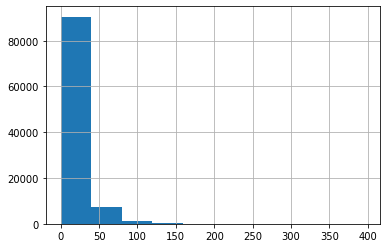

In [111]:
(xx.seconds/60).hist()

In [114]:
xx.seconds.sort_values(ascending=False).iloc[:20]

index
31905      23807
186679     23339
949056     20371
45279      19996
981435     19434
1044645    17689
1000135    17315
221913     16894
360318     16809
946808     16424
103886     16116
659401     14661
108605     14511
398842     14436
448526     14269
459546     13885
245268     13592
857514     13557
930236     13493
200382     13388
Name: 총소요시간, dtype: int64

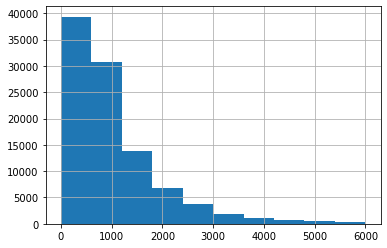

In [117]:
xx.seconds[xx.seconds<6000].hist()

In [120]:
xy = outside['총소요시간'].dt.seconds

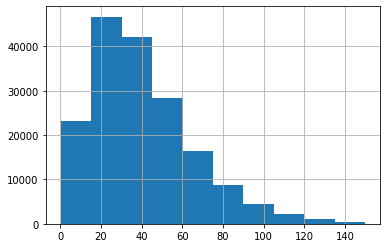

In [123]:
(xy[xy<9000]/60).hist()

In [136]:
outside

,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역,승하차
index,,,,,,,,,,,,,,,
2,4199619.0,4107936.0,2018-07-01 12:36:53,2018-07-01 13:42:23,23180,66,1,1550,1,01:05:30,6123,화성시,6971,수원시,화성시-수원시
66877,4199619.0,4107936.0,2018-07-01 11:31:42,2018-07-01 12:34:36,23180,63,1,1550,1,01:02:54,6123,화성시,6971,수원시,화성시-수원시
304632,4199619.0,4107936.0,2018-07-02 07:23:49,2018-07-02 08:24:50,23180,61,1,1110,4,01:01:01,6123,화성시,6971,수원시,화성시-수원시
347376,4199619.0,4107936.0,2018-07-02 11:54:56,2018-07-02 12:57:02,23180,62,1,1550,1,01:02:06,6123,화성시,6971,수원시,화성시-수원시
571607,4199619.0,4107936.0,2018-07-03 06:08:27,2018-07-03 07:06:20,23180,58,1,1550,1,00:57:53,6123,화성시,6971,수원시,화성시-수원시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997375,4123667.0,4100062.0,2018-07-04 07:14:42,2018-07-04 08:15:09,28380,55,3,1650,1,01:00:27,5338,화성시,6480,안양시,화성시-안양시
535974,4119362.0,4101846.0,2018-07-02 16:53:24,2018-07-02 18:15:44,22516,64,4,1550,1,01:22:20,5442,화성시,5430,안산시,화성시-안산시
692274,4195724.0,4170946.0,2018-07-03 05:13:05,2018-07-03 06:27:33,26880,51,3,1650,1,01:14:28,6873,수원시,6412,화성시,화성시-수원시


In [140]:
Counter(outside[outside['총소요시간']>outside['총소요시간'].mean()]['승하차']).most_common()

[('화성시-수원시', 44737),
 ('화성시-오산시', 5833),
 ('화성시-용인시', 5056),
 ('화성시-서울시', 4855),
 ('화성시-성남시', 4505),
 ('화성시-안양시', 2353),
 ('화성시-안산시', 1997),
 ('화성시-평택시', 1307),
 ('화성시-군포시', 785),
 ('화성시-의왕시', 452),
 ('화성시-광명시', 216),
 ('화성시-부천시', 197),
 ('화성시-시흥시', 169),
 ('화성시-안성시', 139),
 ('화성시-광주시', 126),
 ('화성시-고양시', 94),
 ('화성시-남양주시', 57),
 ('화성시-김포시', 39),
 ('화성시-구리시', 39),
 ('화성시-의정부시', 37),
 ('화성시-하남시', 33),
 ('화성시-파주시', 26),
 ('화성시-과천시', 21),
 ('화성시-이천시', 16),
 ('화성시-양주시', 5),
 ('화성시-가평시', 5),
 ('화성시-여주시', 3),
 ('화성시-포천시', 2),
 ('화성시-양평군', 1)]

In [124]:
outside.describe()

,승차정류장,하차정류장,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,하차ID
count,1.741920e+05,1.741920e+05,174192.000000,174192.000000,174192.000000,174192.000000,174192.000000,174192,174192.000000,174192.000000
mean,3.896139e+06,3.885952e+06,12688.661196,36.011556,1.601451,1405.225900,1.275328,0 days 00:40:53.298790,7073.429193,7075.437351
std,1.012441e+06,1.004315e+06,9927.746855,21.641400,0.716365,384.636526,0.883443,0 days 00:25:57.320128,498.321909,494.754071
min,1.500000e+02,1.500000e+02,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:15,3623.000000,3281.000000
25%,4.108035e+06,4.108028e+06,6640.000000,20.000000,1.000000,1250.000000,1.000000,0 days 00:22:07,6781.000000,6872.000000
50%,4.116982e+06,4.116998e+06,9980.000000,32.000000,1.000000,1250.000000,1.000000,0 days 00:35:53,7170.000000,7170.000000
75%,4.160328e+06,4.150172e+06,15250.000000,47.000000,2.000000,1450.000000,1.000000,0 days 00:54:05.250000,7376.000000,7451.000000
max,9.199458e+06,9.197722e+06,163204.000000,639.000000,5.000000,10000.000000,8.000000,0 days 11:21:25,11006.000000,12249.000000


In [125]:
inside.describe()

,승차정류장,하차정류장,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,하차ID
count,9.949500e+04,9.949500e+04,99495.000000,99495.000000,99495.000000,99495.000000,99495.000000,99495,99495.000000,99495.000000
mean,4.155446e+06,4.161054e+06,5112.031459,15.745766,1.227680,1260.286547,1.474747,0 days 00:17:58.067973,7183.696588,7185.280818
std,2.732266e+05,3.179458e+05,5270.117638,14.157660,0.509379,326.527853,1.110406,0 days 00:18:09.204782,562.089437,556.357136
min,1.716000e+03,1.716000e+03,0.000000,0.000000,1.000000,0.000000,1.000000,0 days 00:00:01,3623.000000,3623.000000
25%,4.117318e+06,4.117325e+06,2040.000000,7.000000,1.000000,1250.000000,1.000000,0 days 00:06:52,6891.000000,6883.000000
50%,4.130123e+06,4.130181e+06,3650.000000,12.000000,1.000000,1250.000000,1.000000,0 days 00:12:37,7362.000000,7362.000000
75%,4.170942e+06,4.170944e+06,6310.000000,20.000000,1.000000,1250.000000,1.000000,0 days 00:22:33,7460.000000,7460.000000
max,9.170723e+06,9.170723e+06,137426.000000,347.000000,5.000000,6260.000000,8.000000,0 days 06:36:47,8035.000000,8035.000000


In [143]:
subway = trips_interested[trips_interested['버스노선ID']==0].index.unique()

In [152]:
od_r2.loc[subway].dropna(subset=['승차정류장'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,승차정류장,하차정류장,승차일시,하차일시,총통행거리,총탑승시간,환승횟수,총이용금액,사용자구분,총소요시간,승차ID,승차지역,하차ID,하차지역
index,,,,,,,,,,,,,,
6,4197606.0,4116627.0,2018-07-01 07:57:31,2018-07-01 08:53:59,24480.0,39.0,3.0,1550.0,1.0,00:56:28,7267.0,화성시,6288.0,군포시
56,1872.0,4130090.0,2018-07-01 08:47:34,2018-07-01 09:18:40,8980.0,27.0,2.0,1250.0,1.0,00:31:06,6972.0,수원시,7266.0,화성시
156,4120442.0,1857.0,2018-07-01 16:49:25,2018-07-01 18:05:17,23470.0,73.0,2.0,1550.0,1.0,01:15:52,7653.0,화성시,7823.0,성남시
157,1724.0,4116671.0,2018-07-01 08:52:17,2018-07-01 09:55:10,32050.0,56.0,2.0,1750.0,1.0,01:02:53,7578.0,평택시,6690.0,화성시
158,4117346.0,1724.0,2018-07-01 22:03:10,2018-07-01 23:00:21,31660.0,53.0,2.0,1750.0,1.0,00:57:11,6690.0,화성시,7578.0,평택시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048460,1871.0,4108017.0,2018-07-04 10:19:10,2018-07-04 10:53:06,8110.0,29.0,2.0,1250.0,1.0,00:33:56,7068.0,수원시,7265.0,화성시
1048464,4195716.0,4123159.0,2018-07-04 20:23:46,2018-07-04 21:38:01,28200.0,55.0,3.0,1650.0,1.0,01:14:15,7363.0,화성시,7575.0,평택시
1048514,1707.0,4117231.0,2018-07-04 15:43:59,2018-07-04 16:49:08,24430.0,53.0,2.0,1550.0,1.0,01:05:09,6287.0,안양시,6690.0,화성시
